In [1]:
import cv2
import matplotlib.pyplot as plt
import os, shutil

In [2]:
# print(img)

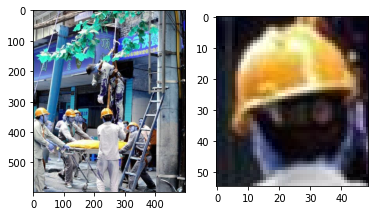

In [7]:
img=cv2.imread("raw_yolo_keras/train/001446_jpg.rf.00a11ab7cffb0a8fec57e98b2c4663d5.jpg")
crop_img = img[ 318:373, 216:265]
fig,axs=plt.subplots(1,2)
axs[0].imshow(img)
axs[1].imshow(crop_img)

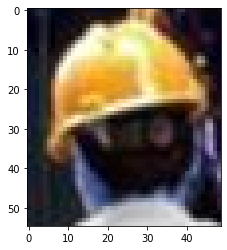

In [5]:
crop_img = img[ 318:373, 216:265]
plt.imshow(crop_img)

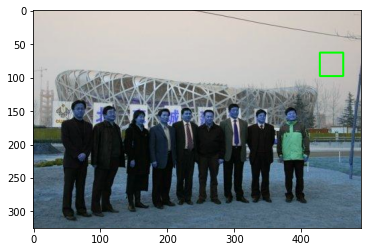

In [5]:

start_point = (428,63)
  
# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (463,98)
  
# Blue color in BGR
color = (0, 255, 0)
  
# Line thickness of 2 px
thickness = 2
  
# Using cv2.rectangle() method
# Draw a rectangle with blue line borders of thickness of 2 px
img = cv2.rectangle(img, start_point, end_point, color, thickness)
  
# Displaying the image 
plt.imshow(img)

### Read the file to get images


In [10]:
#create a folder to store the images of heads with and without helmets
if os.path.isdir("raw_yolo_keras/train/yes_helmet"):
    shutil.rmtree("raw_yolo_keras/train/yes_helmet")
os.mkdir("raw_yolo_keras/train/yes_helmet")


if os.path.isdir("raw_yolo_keras/train/no_helmet"):
    shutil.rmtree("raw_yolo_keras/train/no_helmet")
os.mkdir("raw_yolo_keras/train/no_helmet")


In [11]:
# Using for loop, train folder
count = 0
count_head_yes_helmet=1
count_head_no_helmet=1
print("\nUsing for loop")
with open("raw_yolo_keras/train/_annotations.txt") as fp:
    for line in fp:
        count += 1
        data=line.strip().split()
#         print(data)
        file_name=data[0]
#         print("File ",file_name)
        img=cv2.imread("raw_yolo_keras/train/"+file_name)
#         plt.imshow(img)
#         plt.show()
        for head in data[1:]:
            head_details=head.split(",")
            head_details=[int(i) for i in head_details]
            start_point = (head_details[0],head_details[1])
            end_point = (head_details[2],head_details[3])
            cropped_image=img[start_point[1]:end_point[1],start_point[0]:end_point[0]]
            dim=(76,76)
            resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)
#             print("Head at ",head," shape is ",resized.shape)
#             plt.imshow(resized)
#             plt.show()
            has_helmet=head_details[4]
            if has_helmet:
                head_filename="raw_yolo_keras/train/yes_helmet/"+str(count_head_yes_helmet)+".jpg"
                count_head_yes_helmet+=1
            else:
                head_filename="raw_yolo_keras/train/no_helmet/"+str(count_head_no_helmet)+".jpg"
                count_head_no_helmet+=1
            cv2.imwrite(head_filename,resized)
        if count%500==0:
            print("Image file nmbr",count)
#         print("Line{}: {}".format(count, line.strip()))
print("Number of helmet - heads = ",count_head_yes_helmet)
print("Number of no helmet - heads = ",count_head_no_helmet)


Using for loop
Image file nmbr 500
Image file nmbr 1000
Image file nmbr 1500
Image file nmbr 2000
Image file nmbr 2500
Image file nmbr 3000
Image file nmbr 3500
Image file nmbr 4000
Image file nmbr 4500
Image file nmbr 5000
Number of helmet - heads =  15358
Number of no helmet - heads =  4875


In [12]:
# Using for loop, test folder

#create a folder to store the images of heads with and without helmets
if os.path.isdir("raw_yolo_keras/test/yes_helmet"):
    shutil.rmtree("raw_yolo_keras/test/yes_helmet")
os.mkdir("raw_yolo_keras/test/yes_helmet")


if os.path.isdir("raw_yolo_keras/test/no_helmet"):
    shutil.rmtree("raw_yolo_keras/test/no_helmet")
os.mkdir("raw_yolo_keras/test/no_helmet")





count = 0
count_head_yes_helmet=1
count_head_no_helmet=1
print("\nUsing for loop")
with open("raw_yolo_keras/test/_annotations.txt") as fp:
    for line in fp:
        count += 1
        data=line.strip().split()
#         print(data)
        file_name=data[0]
#         print("File ",file_name)
        img=cv2.imread("raw_yolo_keras/test/"+file_name)
#         plt.imshow(img)
#         plt.show()
        for head in data[1:]:
            head_details=head.split(",")
            head_details=[int(i) for i in head_details]
            start_point = (head_details[0],head_details[1])
            end_point = (head_details[2],head_details[3])
            cropped_image=img[start_point[1]:end_point[1],start_point[0]:end_point[0]]
            dim=(76,76)
            resized = cv2.resize(cropped_image, dim, interpolation = cv2.INTER_AREA)
#             print("Head at ",head," shape is ",resized.shape)
#             plt.imshow(resized)
#             plt.show()
            has_helmet=head_details[4]
            if has_helmet:
                head_filename="raw_yolo_keras/test/yes_helmet/"+str(count_head_yes_helmet)+".jpg"
                count_head_yes_helmet+=1
            else:
                head_filename="raw_yolo_keras/test/no_helmet/"+str(count_head_no_helmet)+".jpg"
                count_head_no_helmet+=1
            cv2.imwrite(head_filename,resized)
        if count%500==0:
            print("Image file nmbr",count)
#         print("Line{}: {}".format(count, line.strip()))
print("Number of helmet - heads = ",count_head_yes_helmet)
print("Number of no helmet - heads = ",count_head_no_helmet)


Using for loop
Image file nmbr 500
Image file nmbr 1000
Image file nmbr 1500
Number of helmet - heads =  5006
Number of no helmet - heads =  1804


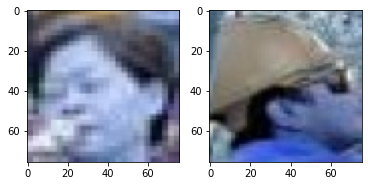

In [12]:
img1=cv2.imread("raw_yolo_keras/train/no_helmet/898.jpg")
img2=cv2.imread("raw_yolo_keras/train/yes_helmet/9991.jpg")

fig,axs=plt.subplots(1,2)
axs[0].imshow(img1)
axs[1].imshow(img2)
